In [3]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import pandas as pd
import shapely

In [ ]:
def hillshade(array: np.ndarray, azimuth: int = 315, angle_altitude: int = 45):
    """
    Computes hillshade from a 2D array of elevation data.
    Calculates the gradient to determine slope and aspect,
    then computes hillshade based on specified azimuth and altitude angles.
    - Azimuth is the direction of the light source in degrees (0° is north, 90° is east, 180° is south, 270° is west).
    - Altitude is the angle of the light source above the horizon in degrees.

    Args:
        array (np.ndarray): 2D array of elevation data.
        azimuth (int, optional): Azimuth angle in degrees. Defaults to 315.
        angle_altitude (int, optional): Altitude angle in degrees. Defaults to 45.

    Returns:
        np.ndarray: Hillshade image as a 2D array with values scaled from 0 to 255.
    """
    x, y = np.gradient(array)
    slope = np.pi / 2.0 - np.arctan(np.sqrt(x * x + y * y))
    aspect = np.arctan2(-x, y)
    azimuth_rad = azimuth * np.pi / 180.0
    altitude_rad = angle_altitude * np.pi / 180.0
    shaded = np.sin(altitude_rad) * np.sin(slope) + np.cos(altitude_rad) * np.cos(
        slope
    ) * np.cos(azimuth_rad - aspect)
    return 255 * (shaded + 1) / 2

Dataset profile: {'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9999.0, 'width': 5000, 'height': 5000, 'count': 1, 'crs': CRS.from_wkt('PROJCS["Estonian Coordinate System of 1997",GEOGCS["EST97",DATUM["Estonia_1997",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6180"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4180"]],PROJECTION["Lambert_Conformal_Conic_2SP"],PARAMETER["latitude_of_origin",57.5175539305556],PARAMETER["central_meridian",24],PARAMETER["standard_parallel_1",59.3333333333333],PARAMETER["standard_parallel_2",58],PARAMETER["false_easting",500000],PARAMETER["false_northing",6375000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Northing",NORTH],AXIS["Easting",EAST],AUTHORITY["EPSG","3301"]]'), 'transform': Affine(1.0, 0.0, 490000.0,
       0.0, -1.0, 6510000.0), 'blockxsize': 512, 'blockysize': 512, 'tiled': True, 'compress': 'deflate', 'interleave': 

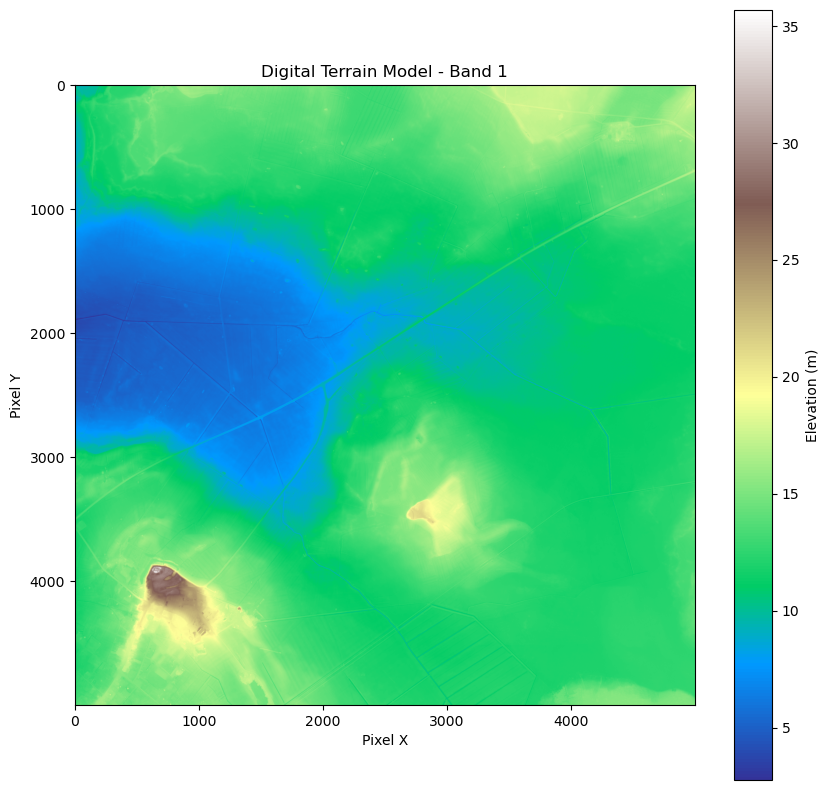

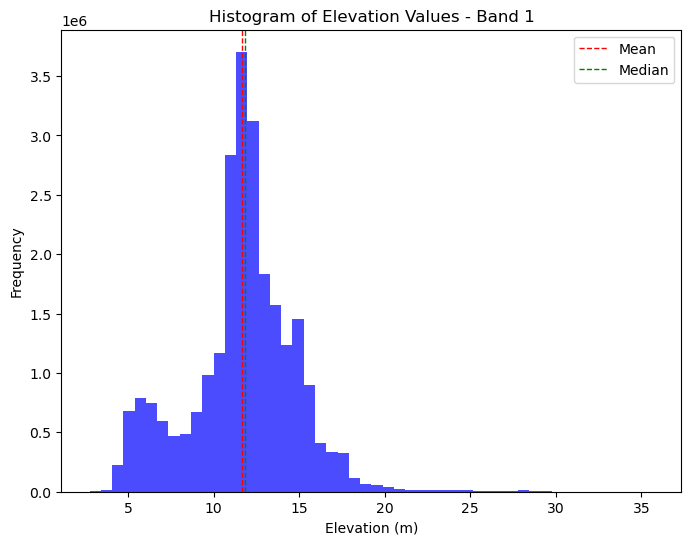

Basic Statistics for Band 1:
Min value: 2.76
Max value: 35.69
Mean value: 11.69
Standard Deviation: 3.18
Median value: 11.87
25th percentile: 10.37
75th percentile: 13.48

Count of valid data points: 25000000


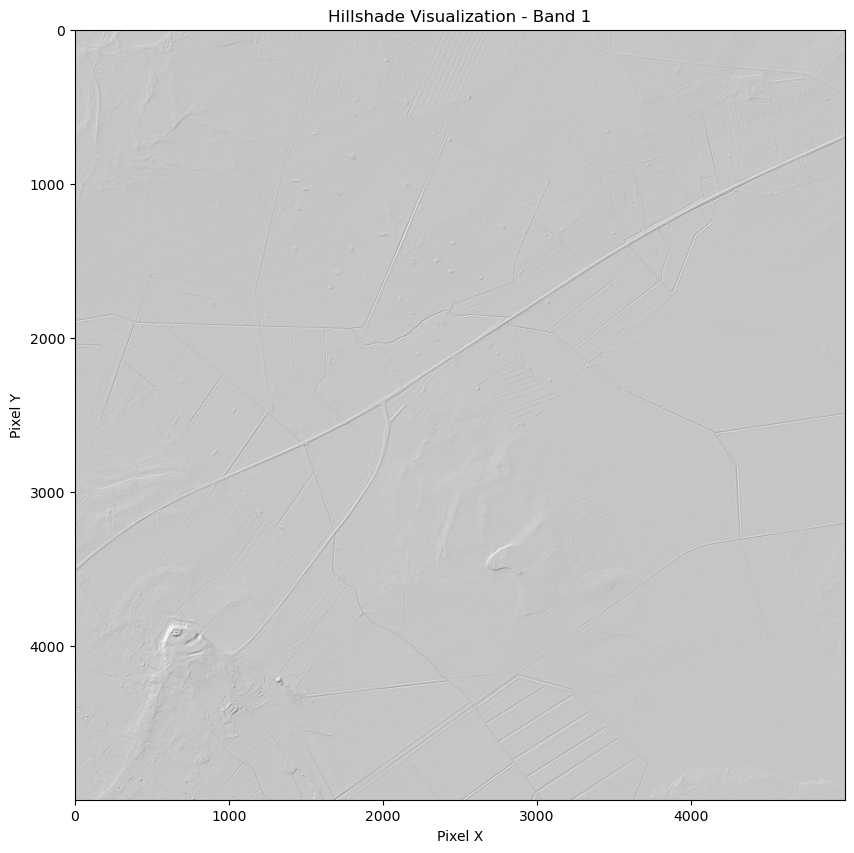

In [ ]:
# Inspecting a Digital Terrain Model's tif file
with rasterio.open("../data/raw/dtm/62093_dtm_1m.tif") as dataset:
    # Print dataset profile
    print(f"Dataset profile: {dataset.profile}")
    # Print width and height
    print(f"Width: {dataset.width}, Height: {dataset.height}")
    # Print coordinate reference system
    print(f"CRS: {dataset.crs}")
    # Print transform information. This includes pixel size and origin.
    print(f"Transform: {dataset.transform}")
    # Print bounds of the dataset
    print(f"Bounds: {dataset.bounds}")
    # Print number of bands
    print(f"Number of bands: {dataset.count}")
    # Print data types of the bands
    print(f"Data types: {dataset.dtypes}")
    # Print driver information
    print(f"Driver: {dataset.driver}")
    # Print no data value
    print(f"No data value: {dataset.nodata}")
    # Print metadata
    print(f"Metadata: {dataset.meta}")

    # Plot the first band
    band1 = dataset.read(1)

    # Visualize the first band
    plt.figure(figsize=(10, 10))
    plt.imshow(band1, cmap="terrain")
    plt.colorbar(label="Elevation (m)")
    plt.title("Digital Terrain Model - Band 1")
    plt.xlabel("Pixel X")
    plt.ylabel("Pixel Y")
    plt.show()

    # Plot value histogram for the first band
    plt.figure(figsize=(8, 6))
    plt.hist(band1.flatten(), bins=50, color="blue", alpha=0.7)
    # Add vertical lines for mean and median
    plt.axvline(
        band1.mean(), color="red", linestyle="dashed", linewidth=1, label="Mean"
    )
    plt.axvline(
        np.median(band1), color="green", linestyle="dashed", linewidth=1, label="Median"
    )
    plt.title("Histogram of Elevation Values - Band 1")
    plt.xlabel("Elevation (m)")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

    # Compute and print basic statistics for the first band
    print("Basic Statistics for Band 1:")
    print(f"Min value: {band1.min():.2f}")
    print(f"Max value: {band1.max():.2f}")
    print(f"Mean value: {band1.mean():.2f}")
    print(f"Standard Deviation: {band1.std():.2f}")
    print(f"Median value: {np.median(band1):.2f}")
    print(f"25th percentile: {np.percentile(band1, 25):.2f}")
    print(f"75th percentile: {np.percentile(band1, 75):.2f}")
    print()

    # Create a mask for no data values and print the count of valid data points
    no_data_mask = band1 == dataset.nodata
    valid_data_count = np.sum(~no_data_mask)
    print(f"Count of valid data points: {valid_data_count}")

    # Create a simple hillshade visualization
    hillshade_image = hillshade(band1)
    plt.figure(figsize=(10, 10))
    plt.imshow(hillshade_image, cmap="gray")
    plt.title("Hillshade Visualization - Band 1")
    plt.xlabel("Pixel X")
    plt.ylabel("Pixel Y")
    plt.show()

Dataset profile: {'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 25000, 'height': 25000, 'count': 3, 'crs': CRS.from_wkt('PROJCS["Estonian Coordinate System of 1997",GEOGCS["EST97",DATUM["Estonia_1997",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6180"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4180"]],PROJECTION["Lambert_Conformal_Conic_2SP"],PARAMETER["latitude_of_origin",57.5175539305556],PARAMETER["central_meridian",24],PARAMETER["standard_parallel_1",59.3333333333333],PARAMETER["standard_parallel_2",58],PARAMETER["false_easting",500000],PARAMETER["false_northing",6375000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Northing",NORTH],AXIS["Easting",EAST],AUTHORITY["EPSG","3301"]]'), 'transform': Affine(0.2, 0.0, 490000.0,
       0.0, -0.2, 6510000.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'YCbCr JPEG', 'interleave': 

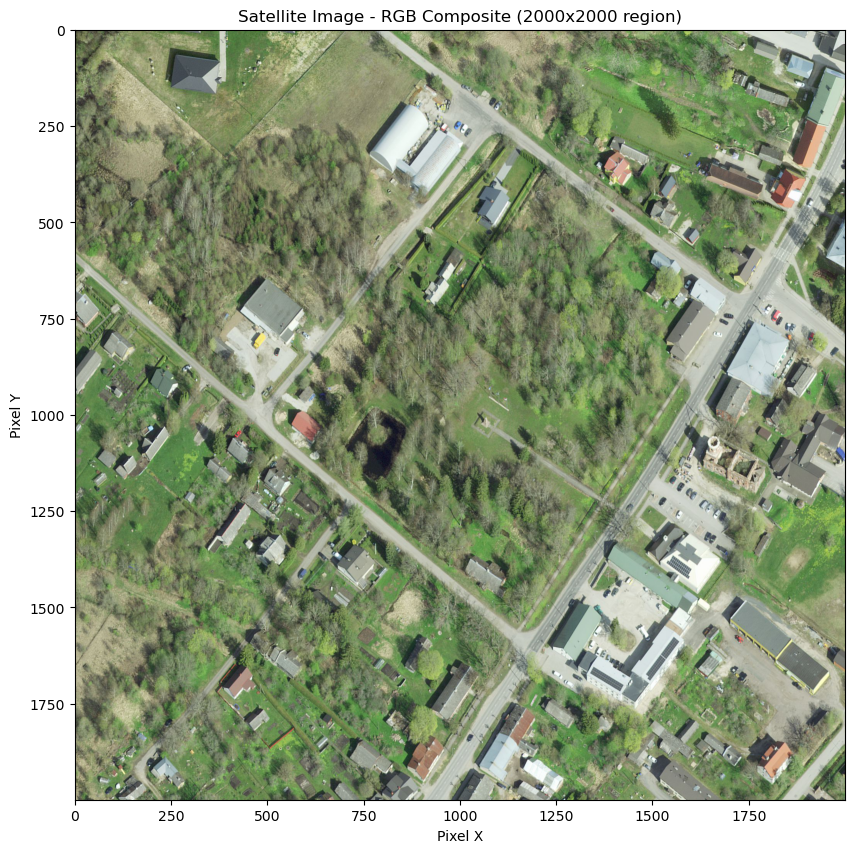

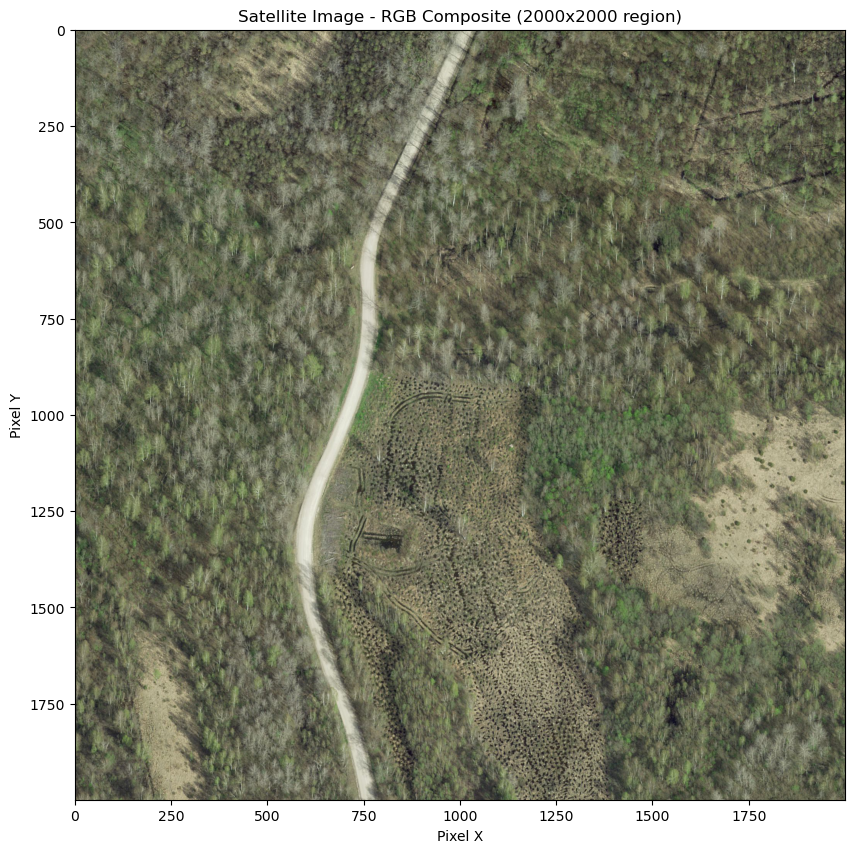

In [ ]:
# Inspecting a Satellite Image's tif file
with rasterio.open("../data/raw/satellite/62093.tif") as dataset:
    # Print dataset profile
    print(f"Dataset profile: {dataset.profile}")
    # Print width and height
    print(f"Width: {dataset.width}, Height: {dataset.height}")
    # Print coordinate reference system
    print(f"CRS: {dataset.crs}")
    # Print transform information. This includes pixel size and origin.
    print(f"Transform: {dataset.transform}")
    # Print bounds of the dataset
    print(f"Bounds: {dataset.bounds}")
    # Print number of bands
    print(f"Number of bands: {dataset.count}")
    # Print data types of the bands
    print(f"Data types: {dataset.dtypes}")
    # Print driver information
    print(f"Driver: {dataset.driver}")
    # Print no data value
    print(f"No data value: {dataset.nodata}")
    # Print metadata
    print(f"Metadata: {dataset.meta}")

    # Plot the first three bands as an RGB image
    # Very expensive in terms of memory for large images
    # band1 = dataset.read(1)
    # band2 = dataset.read(2)
    # band3 = dataset.read(3)
    # rgb_image = np.dstack((band1, band2, band3))
    # plt.figure(figsize=(10, 10))
    # plt.imshow(rgb_image)
    # plt.title('Satellite Image - RGB Composite')
    # plt.xlabel('Pixel X')
    # plt.ylabel('Pixel Y')
    # plt.show()

    # Plot a smaller region to save memory
    # Choose a 2000x2000 pixel window from the bottom-left corner
    band1 = dataset.read(
        1, window=rasterio.windows.Window(0, dataset.height - 2000, 2000, 2000)
    )
    band2 = dataset.read(
        2, window=rasterio.windows.Window(0, dataset.height - 2000, 2000, 2000)
    )
    band3 = dataset.read(
        3, window=rasterio.windows.Window(0, dataset.height - 2000, 2000, 2000)
    )
    rgb_image = np.dstack((band1, band2, band3))
    plt.figure(figsize=(10, 10))
    plt.imshow(rgb_image)
    plt.title("Satellite Image - RGB Composite (2000x2000 region)")
    plt.xlabel("Pixel X")
    plt.ylabel("Pixel Y")
    plt.show()

    # Choose a 2000x2000 pixel window from the top-left corner
    band1 = dataset.read(1, window=rasterio.windows.Window(0, 0, 2000, 2000))
    band2 = dataset.read(2, window=rasterio.windows.Window(0, 0, 2000, 2000))
    band3 = dataset.read(3, window=rasterio.windows.Window(0, 0, 2000, 2000))
    rgb_image = np.dstack((band1, band2, band3))
    plt.figure(figsize=(10, 10))
    plt.imshow(rgb_image)
    plt.title("Satellite Image - RGB Composite (2000x2000 region)")
    plt.xlabel("Pixel X")
    plt.ylabel("Pixel Y")
    plt.show()

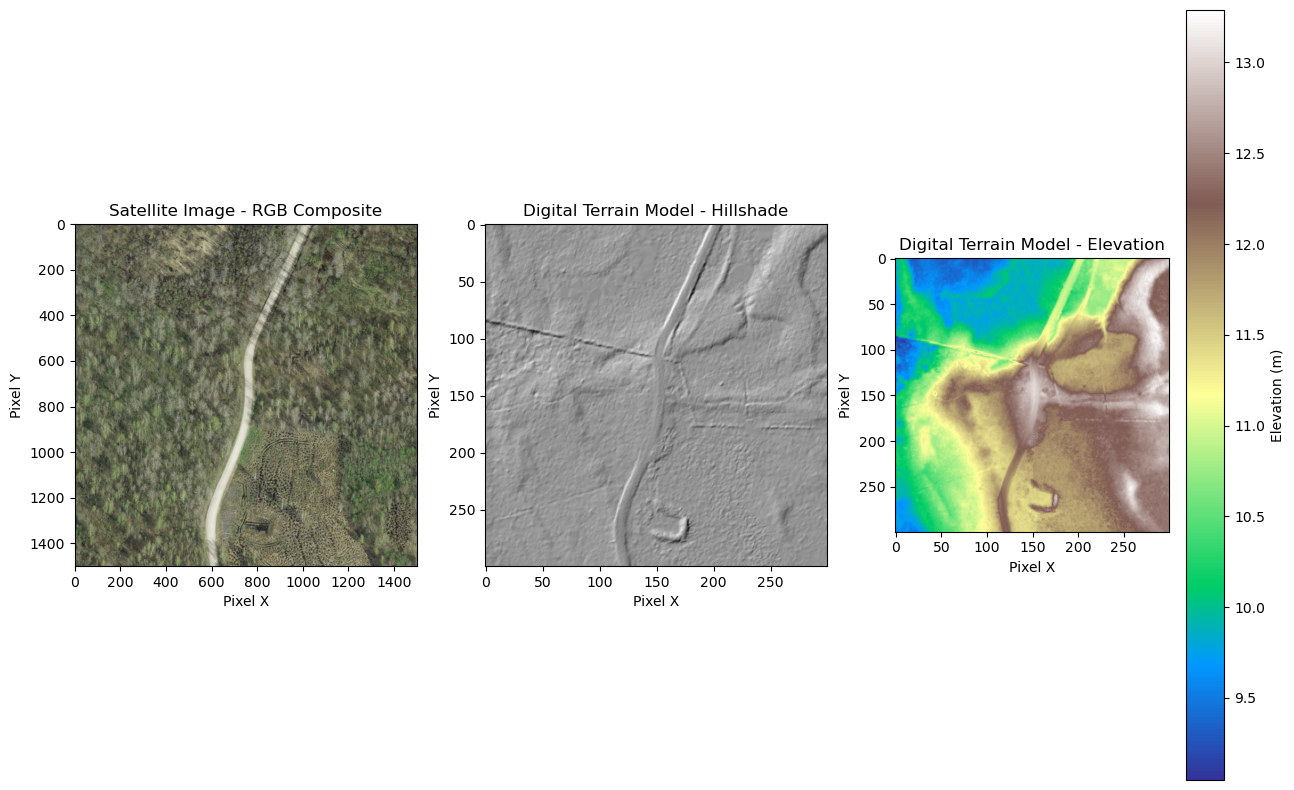

In [59]:
# Show a satellite image RGB composite and DTM visualization (hillshade and elevation) side by side
with (
    rasterio.open("../data/raw/satellite/62093.tif") as sat_dataset,
    rasterio.open("../data/raw/dtm/62093_dtm_1m.tif") as dtm_dataset,
):
    # Scale factor so that both datasets cover the same area
    scale_factor = sat_dataset.width // dtm_dataset.width
    dat_window_size = 300
    sat_window_size = dat_window_size * scale_factor
    # Read a 1000x1000 pixel window from both datasets
    sat_band1 = sat_dataset.read(
        1, window=rasterio.windows.Window(0, 0, sat_window_size, sat_window_size)
    )
    sat_band2 = sat_dataset.read(
        2, window=rasterio.windows.Window(0, 0, sat_window_size, sat_window_size)
    )
    sat_band3 = sat_dataset.read(
        3, window=rasterio.windows.Window(0, 0, sat_window_size, sat_window_size)
    )
    dtm_band1 = dtm_dataset.read(
        1, window=rasterio.windows.Window(0, 0, dat_window_size, dat_window_size)
    )

    # Create RGB composite for satellite image
    sat_rgb = np.dstack((sat_band1, sat_band2, sat_band3))
    # Create hillshade for DTM
    dtm_hillshade = hillshade(dtm_band1)

    # Plot side by side
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 10))
    ax1.imshow(sat_rgb)
    ax1.set_title("Satellite Image - RGB Composite")
    ax1.set_xlabel("Pixel X")
    ax1.set_ylabel("Pixel Y")
    ax2.imshow(dtm_hillshade, cmap="gray")
    ax2.set_title("Digital Terrain Model - Hillshade")
    ax2.set_xlabel("Pixel X")
    ax2.set_ylabel("Pixel Y")
    ax3.imshow(dtm_band1, cmap="terrain")
    ax3.set_title("Digital Terrain Model - Elevation")
    ax3.set_xlabel("Pixel X")
    ax3.set_ylabel("Pixel Y")
    fig.colorbar(ax3.images[0], ax=ax3, label="Elevation (m)")
    ax3.imshow(dtm_band1, cmap="terrain")
    plt.show()